In [33]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [34]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier

In [35]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\A\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\A\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
resumeData = pd.read_csv('UpdatedResumeDataSet.csv' ,encoding='utf-8')
resumeData['structured_resume'] = ''
resumeData.head()

,Category,Resume,structured_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [37]:
print("Displaying the unique categories in resume ")
print(resumeData['Category'].unique())

Displaying the unique categories in resume 
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [38]:
print ("Displaying the unique categories of resume and number of records")
Datas=resumeData['Category'].value_counts()
print(Datas)

Displaying the unique categories of resume and number of records
Java Developer               84
Testing                      71
DevOps Engineer              55
Python Developer             48
HR                           45
Web Designing                45
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


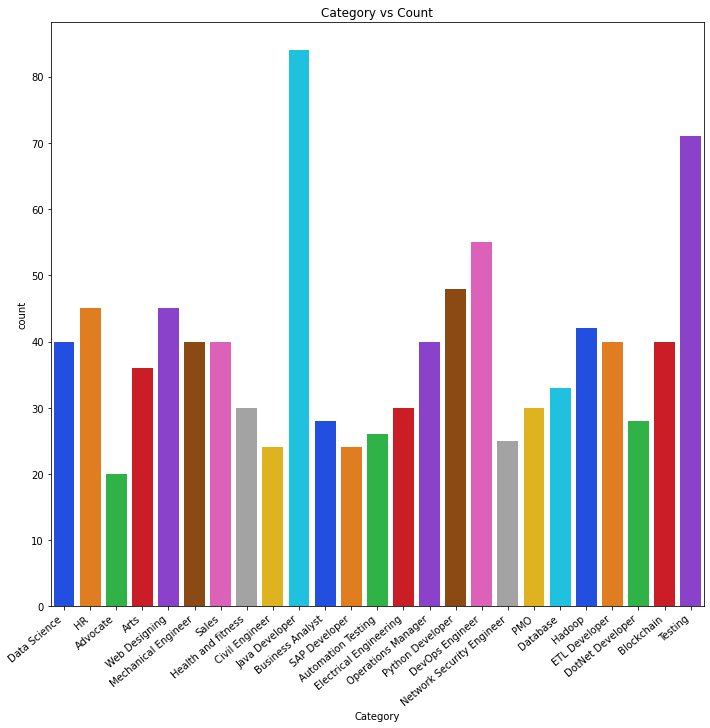

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
ax = sns.countplot(x="Category", data=resumeData,palette="bright")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title("Category vs Count")
plt.show()

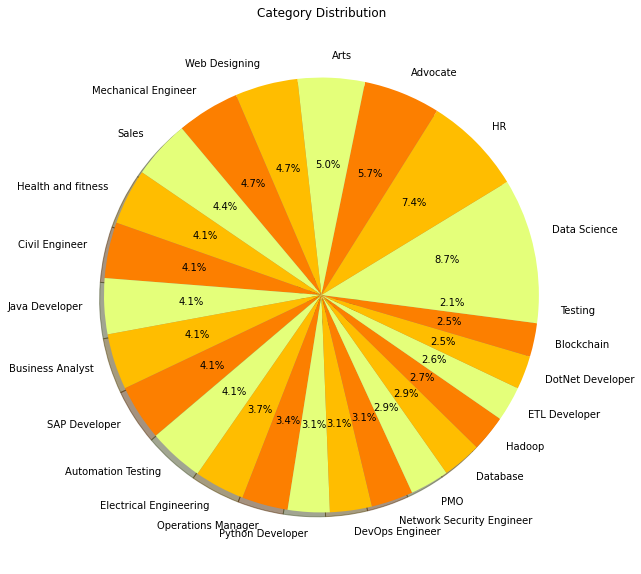

In [40]:
from matplotlib.gridspec import GridSpec
targetCount = resumeData['Category'].value_counts()
targetLabel  = resumeData['Category'].unique()
plt.figure(1, figsize=(22,22))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Wistia')
colors = [cmap(i) for i in np.linspace(0, 1, 3)]
plt.subplot(the_grid[0, 1], aspect=1, title='Category Distribution')
source_pie = plt.pie(targetCount, labels=targetLabel, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [41]:
import re
def clean_resume(Text):
    Text = re.sub('http\S+\s*', ' ', Text)
    Text = re.sub('@\S+', '  ', Text)
    Text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', Text)
    Text = re.sub('RT|cc', ' ', Text)
    Text = re.sub('#\S+', '', Text)
    Text = re.sub(r'[^\x00-\x7f]',r' ',Text) 
    Text = re.sub('\s+', ' ', Text)
    return Text    
resumeData['structured_resume'] = resumeData.Resume.apply(lambda x: clean_resume(x))

In [42]:
Set_Of_StopWords = set(stopwords.words('english')+['``',"''"])
total_Words =[]
Sentences = resumeData['Resume'].values
cleaned_Sentences = ""
for i in range(0,160):
    cleanedText = clean_resume(Sentences[i])
    cleaned_Sentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in Set_Of_StopWords and word not in string.punctuation:
            total_Words.append(word)

In [43]:
wordfrequencydist = nltk.FreqDist(total_Words)
mostCommon = wordfrequencydist.most_common(50)
print(mostCommon)

[('Details', 484), ('Exprience', 446), ('months', 376), ('company', 330), ('description', 310), ('1', 290), ('year', 232), ('January', 216), ('Less', 204), ('Data', 200), ('data', 192), ('Skill', 166), ('Maharashtra', 166), ('6', 164), ('Python', 156), ('Science', 154), ('I', 146), ('Education', 142), ('College', 140), ('The', 126), ('project', 126), ('like', 126), ('Project', 124), ('Learning', 116), ('India', 114), ('Machine', 112), ('University', 112), ('Web', 106), ('using', 104), ('monthsCompany', 102), ('B', 98), ('C', 98), ('SQL', 96), ('time', 92), ('learning', 90), ('Mumbai', 90), ('Pune', 90), ('Arts', 90), ('A', 84), ('application', 84), ('Engineering', 78), ('24', 76), ('various', 76), ('Software', 76), ('Responsibilities', 76), ('Nagpur', 76), ('development', 74), ('Management', 74), ('projects', 74), ('Technologies', 72)]


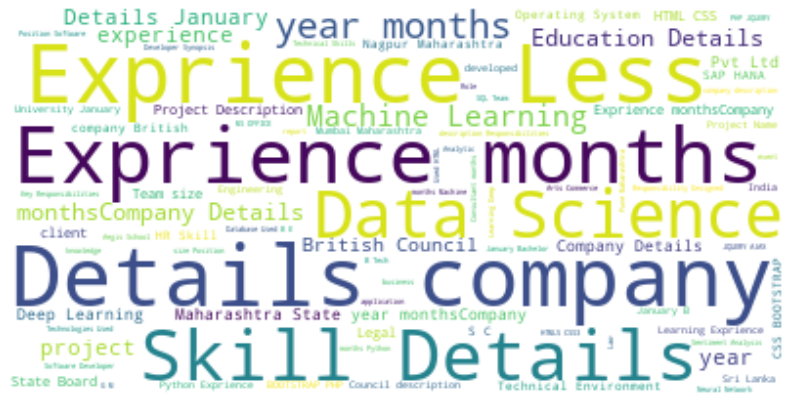

In [44]:
word_cloud = WordCloud(background_color="white").generate(cleaned_Sentences)
plt.figure(figsize=(14,14))
plt.imshow(word_cloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [45]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Category']
le = LabelEncoder()
print(resumeData['Category'].unique())
for i in var_mod:
    resumeData[i] = le.fit_transform(resumeData[i])
print(resumeData['Category'].unique())




['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']
[ 6 12  0  1 24 16 22 14  5 15  4 21  2 11 18 20  8 17 19  7 13 10  9  3
 23]


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
required_Text = resumeData['structured_resume'].values
required_Target = resumeData['Category'].values
word_vectorizer = TfidfVectorizer(sublinear_tf=True,stop_words='english',max_features=1500)
word_vectorizer.fit(required_Text)


WordFeatures = word_vectorizer.transform(required_Text)

WordFeatures.shape

(964, 1500)

In [47]:
from sklearn.svm import SVC

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,required_Target,random_state=0, test_size=0.2)
clf = SVC(probability=True)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print("KNeighbors Classifier")
print('Accuracy on training dataset: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy on test dataset: {:.2f}'.format(clf.score(X_test, y_test)))
print(metrics.classification_report(y_test, prediction))

KNeighbors Classifier
Accuracy on training dataset: 1.00
Accuracy on test dataset: 0.99
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00        10
           8       1.00      0.89      0.94         9
           9       1.00      1.00      1.00         8
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         9
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00        13
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00    

In [48]:
prediction

array([23, 14,  6, 19, 15, 14, 10, 14, 15,  2,  6, 23,  4, 11, 13,  4, 19,
        3, 23, 13, 12, 11, 17, 22, 19, 16,  5, 20,  3,  2, 20, 18, 22, 20,
        7, 23, 22, 18, 13, 20, 10, 20, 14, 20, 15, 15,  8, 11,  4, 22,  1,
       24, 14, 15, 22,  9,  7, 15, 13, 23, 18,  3,  0, 15, 15, 15, 16, 21,
       13, 18, 12, 13, 22, 12, 13, 22,  8,  7, 19,  4, 24, 14,  7,  1, 24,
       13, 12, 10,  9,  8, 22,  8, 17, 11,  9, 23, 11, 15, 12, 13,  4, 17,
        2,  5,  6, 10,  0, 19, 10, 10, 22, 10, 15,  8, 15, 15, 22,  6, 14,
        6,  0,  4,  5,  7,  7, 13, 23,  6,  9,  9, 21, 11,  5, 17,  9, 24,
       23, 13,  8, 23, 13, 20, 11,  8, 16, 13, 21, 24,  7, 21,  3, 15, 22,
       19, 15, 23,  9, 15, 15,  6,  2,  8, 23, 11, 23, 24,  7,  3, 20,  2,
       10, 22, 15,  2, 11,  9,  1, 20,  6,  3,  3, 24, 24, 12,  5, 23, 18,
       22, 20,  7,  7,  6, 15])

In [49]:
print(y_test)

[23 14  6 19 15 14 10 14 15  2  6 23  4 11 13  4 19  3 23 13 12 11 17 22
 19 16  5 20  3  8 20 18 22 20  7 23 22 18 13 20 10 20 14 20 15 15  8 11
  4 22  1 24 14 15 22  9  7 15 13 23 18  3  0 15 15 15 16 21 13 18 12 13
 22 12 13 22  8  7 19  4 24 14  7  1 24 13 12 10  9  8 22  8 17 11  9 23
 11 15 12 13  4 17  2  5  6 10  0 19 10 10 22 10 15  8 15 15 22  6 14  6
  0  4  5  7  7 13 23  6  9  9 21 11  5 17  9 24 23 13  8 23 13 20 11  8
 16 13 21 24  7 21  3 15 22 19 15 23  9 15 15  6  2  8 23 11 23 24  7  3
 20  2 10 22 15  2 11  9  1 20  6  3  3 24 24 12  5 23 18 22 20  7  7  6
 15]


In [50]:
max(y_test)

24

In [51]:
clf

SVC(probability=True)

In [52]:
# from sklearn.externals import joblib

In [53]:
# pip install joblib

In [54]:
import joblib

In [55]:
joblib_file = "model.pkl"  
joblib.dump(clf, joblib_file)

['model.pkl']

In [56]:
jblibmodel = joblib.load(joblib_file)

In [57]:
jblibmodel

SVC(probability=True)

In [58]:
resumeData.head()

,Category,Resume,structured_resume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [59]:
word_vectorizer

TfidfVectorizer(max_features=1500, stop_words='english', sublinear_tf=True)

In [60]:
joblib_file_vec = "model1_vec.pkl"  
joblib.dump(word_vectorizer, joblib_file_vec)

['model1_vec.pkl']

In [61]:
list0 = """0                """

In [62]:
list0

'0                '

In [63]:
dict_job = {
    "Data Science":  6,
    "HR": 12,
    "Advocate":  0,
    "Arts":  1,
    "Web Designing": 24,
    "Mechanical Engineer": 16,
    "Sales": 22,
    "Health and fitness": 14,
    "Civil Engineer":  5,
    "Java Developer": 15,
    "Business Analyst":  4,
    "SAP Developer": 21,
    "Automation Testing":  2,
    "Electrical Engineering": 11,
    "Operations Manager": 18,
    "Python Developer": 20,
    "DevOps Engineer":  8,
    "Network Security Engineer": 17,
    "PMO": 19,
    "Database":  7,
    "Hadoop": 13,
    "ETL Developer": 10,
    "DotNet Developer":  9,
    "Blockchain":  3,
    "Testing": 23

}


In [64]:
new_val = int(input())
result= [new_k for new_k in dict_job.items() if new_k[1] == new_val][0][0]
print(result)

Business Analyst
